# Laboratorio 2 César Rodríguez

### Ejercicio 1: Desarrolle una función que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel.

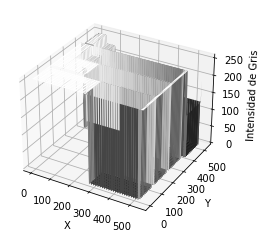

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_grayscale_image_in_3d(image):
    # Se obtienen las dimensiones
    height, width = image.shape
    
    # Se crean y definen las coordenadas del plano cartesiano
    x = np.arange(0, width, 1)
    y = np.arange(0, height, 1)
    x, y = np.meshgrid(x, y)
    
    # Valores de intensidad de gris de la imagen
    z = image
    
    # Crear una figura en tres dimensiones
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Graficasr
    ax.plot_surface(x, y, z, cmap='gray')
    
    # Configurar etiquetas de ejes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Intensidad de Gris')
    
    plt.show()

# Carga de imagen con escala de grises
image = plt.imread('images.jpg')
grayscale_image = np.mean(image, axis=2)  

plot_grayscale_image_in_3d(grayscale_image)

## Ejercicio 2: Implemente una función para cada una de las transformaciones: vistas en clase negativa, lineal, logarítmica y exponencial

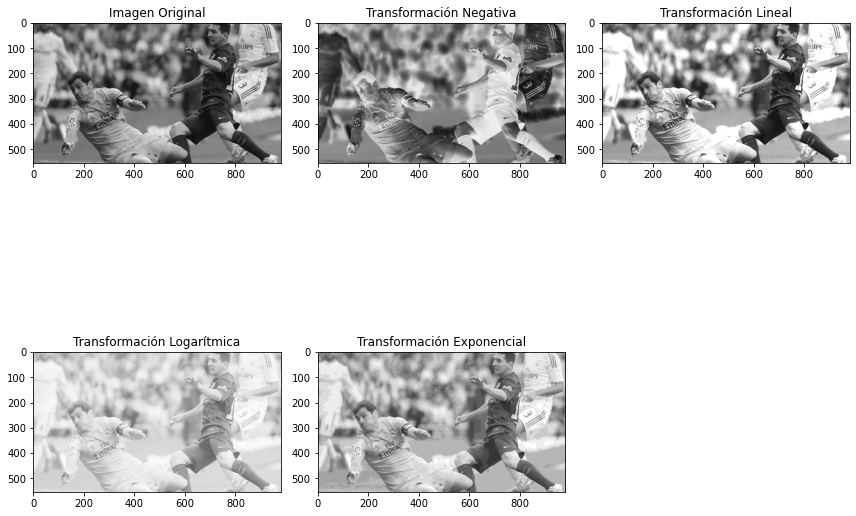

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def negative_transform(image):
    negative_image = 255 - image
    return negative_image

def linear_transform(image, alpha, beta):
    transformed_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return transformed_image

def logarithmic_transform(image, c=1):
    logarithmic_image = c * np.log1p(image)
    logarithmic_image = np.uint8(logarithmic_image)
    return logarithmic_image

def exponential_transform(image, gamma=1):
    exponential_image = np.power(image, gamma)
    exponential_image = np.uint8(exponential_image)
    return exponential_image

# Cargar la imagen
input_image = cv2.imread('image2.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar las transformaciones
negative_image = negative_transform(input_image)
linear_image = linear_transform(input_image, alpha=1.2, beta=30)
logarithmic_image = logarithmic_transform(input_image, c=30)
exponential_image = exponential_transform(input_image, gamma=0.5)

# Mostrar las imágenes originales y transformadas
plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
plt.imshow(input_image, cmap='gray')
plt.title('Imagen Original')

plt.subplot(2, 3, 2)
plt.imshow(negative_image, cmap='gray')
plt.title('Transformación Negativa')

plt.subplot(2, 3, 3)
plt.imshow(linear_image, cmap='gray')
plt.title('Transformación Lineal')

plt.subplot(2, 3, 4)
plt.imshow(logarithmic_image, cmap='gray')
plt.title('Transformación Logarítmica')

plt.subplot(2, 3, 5)
plt.imshow(exponential_image, cmap='gray')
plt.title('Transformación Exponencial')

plt.tight_layout()
plt.show()


## Ejercicio 3: Desarrolle una función que dada dos imágenes a color, realice las operaciones SUMA, RESTA, AND, OR , XOR con ambas imágenes recuerde que para realizar las operaciones lógicas es necesario pasar la imagen a escala de grises y luego binarizarla.

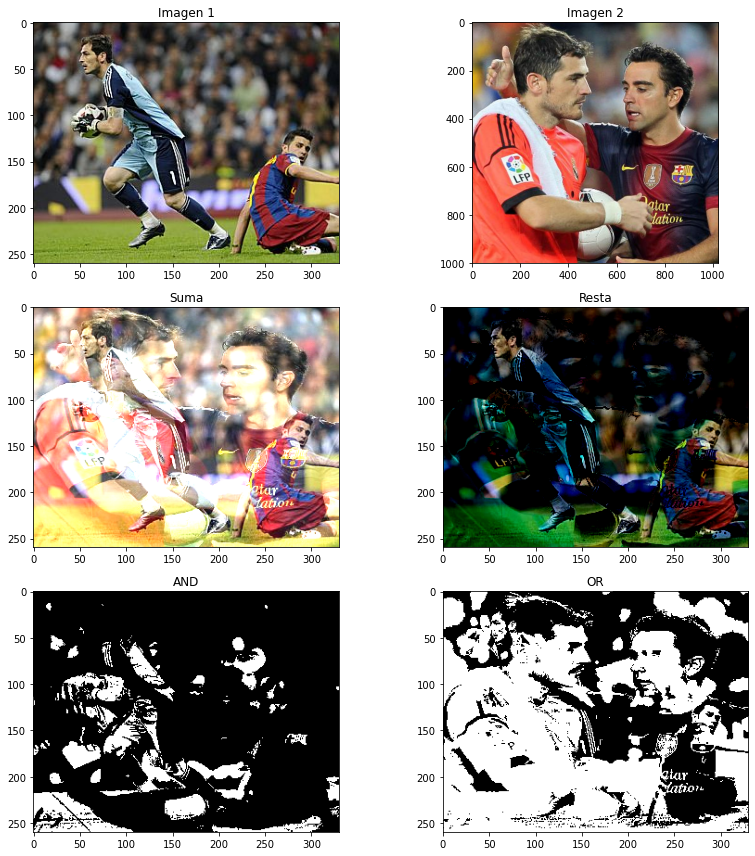

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def perform_image_operations(image1, image2):
    # Redimensionar las imágenes para que tengan las mismas dimensiones
    height = min(image1.shape[0], image2.shape[0])
    width = min(image1.shape[1], image2.shape[1])
    image1 = cv2.resize(image1, (width, height))
    image2 = cv2.resize(image2, (width, height))

    # Convertir las imágenes a escala de grises
    gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Binarizar las imágenes
    _, bin_image1 = cv2.threshold(gray_image1, 128, 255, cv2.THRESH_BINARY)
    _, bin_image2 = cv2.threshold(gray_image2, 128, 255, cv2.THRESH_BINARY)

    # Realizar las operaciones lógicas
    sum_result = cv2.add(image1, image2)
    subtract_result = cv2.subtract(image1, image2)
    and_result = cv2.bitwise_and(bin_image1, bin_image2)
    or_result = cv2.bitwise_or(bin_image1, bin_image2)
    xor_result = cv2.bitwise_xor(bin_image1, bin_image2)

    return sum_result, subtract_result, and_result, or_result, xor_result

# Cargar las imágenes
image1 = cv2.imread('image3.jpg')
image2 = cv2.imread('image4.jpg')

# Realizar las operaciones
sum_result, subtract_result, and_result, or_result, xor_result = perform_image_operations(image1, image2)

# Mostrar las imágenes originales y los resultados
plt.figure(figsize=(12, 12))

plt.subplot(3, 2, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Imagen 1')

plt.subplot(3, 2, 2)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('Imagen 2')

plt.subplot(3, 2, 3)
plt.imshow(cv2.cvtColor(sum_result, cv2.COLOR_BGR2RGB))
plt.title('Suma')

plt.subplot(3, 2, 4)
plt.imshow(cv2.cvtColor(subtract_result, cv2.COLOR_BGR2RGB))
plt.title('Resta')

plt.subplot(3, 2, 5)
plt.imshow(and_result, cmap='gray')
plt.title('AND')

plt.subplot(3, 2, 6)
plt.imshow(or_result, cmap='gray')
plt.title('OR')

plt.tight_layout()
plt.show()


## Ejercicio 4 Realice una comparación entre el algoritmo de Canny, el operador de Sobel y el operador Laplaciano para encontrar los bordes en una imagen, para este ejercicio puede utilizar las funciones de openCV y cualquier imagen, como entregable debe mostrar una comparación entre los tres enfoques con una tabla donde se muestre las ventajas y desventajas de cada enfoque

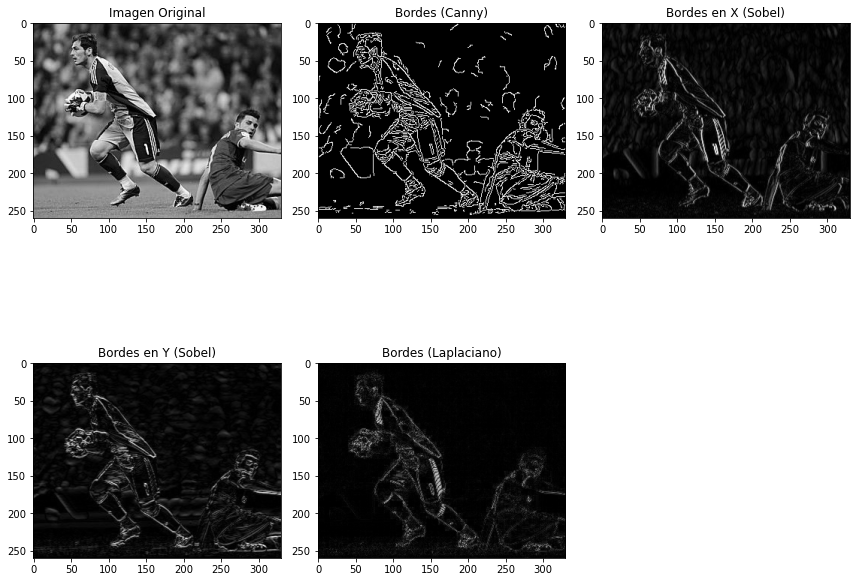

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
image = cv2.imread('image3.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar los diferentes enfoques
canny_edges = cv2.Canny(image, threshold1=100, threshold2=200)
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Crear una figura con varias subtramas para comparar
plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')

plt.subplot(2, 3, 2)
plt.imshow(canny_edges, cmap='gray')
plt.title('Bordes (Canny)')

plt.subplot(2, 3, 3)
plt.imshow(np.abs(sobel_x), cmap='gray')
plt.title('Bordes en X (Sobel)')

plt.subplot(2, 3, 4)
plt.imshow(np.abs(sobel_y), cmap='gray')
plt.title('Bordes en Y (Sobel)')

plt.subplot(2, 3, 5)
plt.imshow(np.abs(laplacian), cmap='gray')
plt.title('Bordes (Laplaciano)')

plt.tight_layout()
plt.show()


## Ejercicio 5  En Python Utilizando funciones de OpenCV deberá aplicar los filtros de convolución de tamaño de kernel (3x3, 5x5 y 7x7) las operaciones que deberá realizar son las siguientes:  Kernel Gaussiano de riodo. Kernel Box de ruido.  Kernel de mediana para ruido.  Kernel Sobel para detección de bornes (en X e Y).  Kernel Lapaciano para detección de bordes.  Kernel de realce (Sharpening).  Kernel de relieve (Embossing)

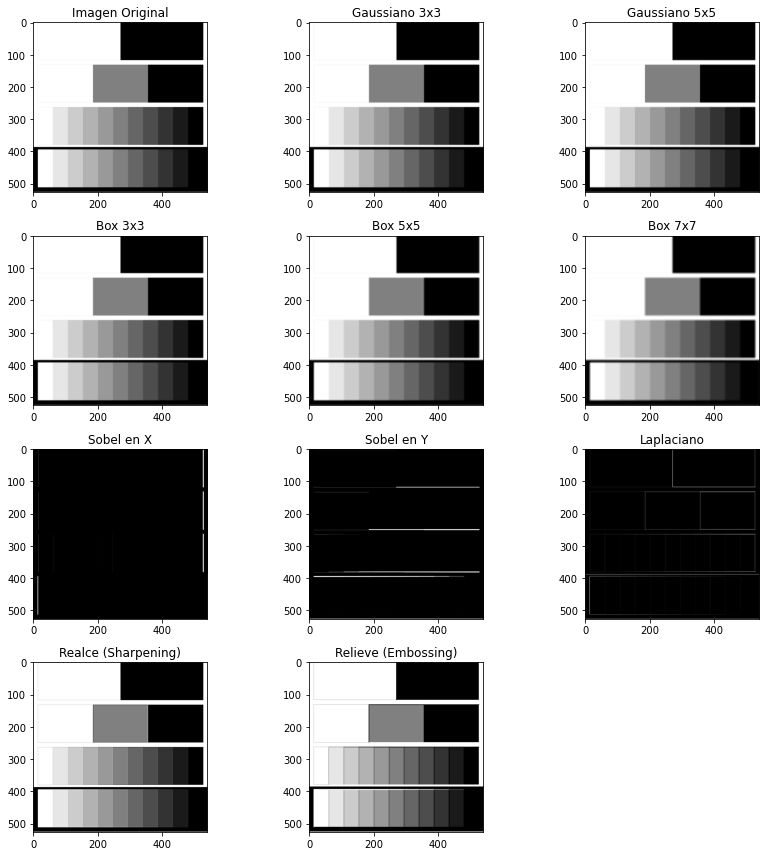

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
image = cv2.imread('images.jpg', cv2.IMREAD_GRAYSCALE)

# Definir los diferentes kernels
gaussian_kernel_3x3 = np.array([[1, 2, 1],
                                [2, 4, 2],
                                [1, 2, 1]]) / 16.0

gaussian_kernel_5x5 = cv2.getGaussianKernel(5, 0)

box_kernel_3x3 = np.ones((3, 3), dtype=np.float32) / 9.0
box_kernel_5x5 = np.ones((5, 5), dtype=np.float32) / 25.0
box_kernel_7x7 = np.ones((7, 7), dtype=np.float32) / 49.0

sobel_kernel_x = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

sobel_kernel_y = np.array([[-1, -2, -1],
                           [0, 0, 0],
                           [1, 2, 1]])

laplacian_kernel = np.array([[0, 1, 0],
                            [1, -4, 1],
                            [0, 1, 0]])

sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])

embossing_kernel = np.array([[-2, -1, 0],
                             [-1, 1, 1],
                             [0, 1, 2]])

# Aplicar los filtros de convolución
gaussian_3x3 = cv2.filter2D(image, -1, gaussian_kernel_3x3)
gaussian_5x5 = cv2.filter2D(image, -1, gaussian_kernel_5x5)
box_3x3 = cv2.filter2D(image, -1, box_kernel_3x3)
box_5x5 = cv2.filter2D(image, -1, box_kernel_5x5)
box_7x7 = cv2.filter2D(image, -1, box_kernel_7x7)
sobel_x = cv2.filter2D(image, -1, sobel_kernel_x)
sobel_y = cv2.filter2D(image, -1, sobel_kernel_y)
laplacian = cv2.filter2D(image, -1, laplacian_kernel)
sharpened = cv2.filter2D(image, -1, sharpening_kernel)
embossed = cv2.filter2D(image, -1, embossing_kernel)

# Crear una figura con varias subtramas para mostrar los resultados
plt.figure(figsize=(12, 12))

plt.subplot(4, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')

plt.subplot(4, 3, 2)
plt.imshow(gaussian_3x3, cmap='gray')
plt.title('Gaussiano 3x3')

plt.subplot(4, 3, 3)
plt.imshow(gaussian_5x5, cmap='gray')
plt.title('Gaussiano 5x5')

plt.subplot(4, 3, 4)
plt.imshow(box_3x3, cmap='gray')
plt.title('Box 3x3')

plt.subplot(4, 3, 5)
plt.imshow(box_5x5, cmap='gray')
plt.title('Box 5x5')

plt.subplot(4, 3, 6)
plt.imshow(box_7x7, cmap='gray')
plt.title('Box 7x7')

plt.subplot(4, 3, 7)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel en X')

plt.subplot(4, 3, 8)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel en Y')

plt.subplot(4, 3, 9)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplaciano')

plt.subplot(4, 3, 10)
plt.imshow(sharpened, cmap='gray')
plt.title('Realce (Sharpening)')

plt.subplot(4, 3, 11)
plt.imshow(embossed, cmap='gray')
plt.title('Relieve (Embossing)')

plt.tight_layout()
plt.show()
